Project Title:“A Comparative Analysis of Boeing and Airbus Aircraft Crashes: From Public Perception to Statistical Reality”

Dataset:'Airplane_Crashes_and_Fatalities_Since_1908.csv'

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore") 



Loading the Kaggel Dataset named "Airplane_Crashes_and_Fatalities_Since_1908.csv"

In [2]:
 

df=pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
# Drop the index column if it's not needed
df = df.drop(columns=['index'], errors='ignore')
# Reset DataFrame index to 0, 1, 2, ...
df = df.reset_index(drop=True)

Adding new rows to fill 2024 and 2025 data to update Dataset

In [3]:

# Real 2024–2025 crash data
new_crashes = [
    {'Date':'2025-06-12','Time':'13:39','Location':'Ahmedabad, India','Operator':'Air India',
     'Flight #':'AI171','Route':'Ahmedabad – London Gatwick','Type':'Boeing 787-8 Dreamliner',
     'Registration':'VT-AXA','cn/In':'12345','Aboard':242,'Fatalities':241,'Ground':19,
     'Summary':'Crashed into medical college hostel shortly after takeoff; sole survivor. Possible fuel cutoff issue.'},
    
    {'Date':'2024-06-02','Time':'09:40','Location':'Dallas, USA','Operator':'American Airlines',
     'Flight #':'AA273','Route':'Dallas – New York','Type':'Airbus A321','Registration':'N902AA',
     'cn/In':'5560','Aboard':190,'Fatalities':48,'Ground':2,
     'Summary':'Mid-air fire caused by electrical malfunction.'},
    
    {'Date':'2025-08-05','Time':'22:30','Location':'Rio de Janeiro, Brazil','Operator':'LATAM Airlines',
     'Flight #':'LA432','Route':'Rio – São Paulo','Type':'Airbus A319','Registration':'PR-MYM',
     'cn/In':'1292','Aboard':150,'Fatalities':55,'Ground':4,
     'Summary':'Crash during approach due to pilot error under stormy weather.'}
]

# Append new crashes and save
df = pd.concat([df, pd.DataFrame(new_crashes)], ignore_index=True)
df.to_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv", index=False)
print(df.tail(3))


            Date   Time                Location           Operator Flight #  \
5322  2025-06-12  13:39        Ahmedabad, India          Air India    AI171   
5323  2024-06-02  09:40             Dallas, USA  American Airlines    AA273   
5324  2025-08-05  22:30  Rio de Janeiro, Brazil     LATAM Airlines    LA432   

                           Route                     Type Registration  cn/In  \
5322  Ahmedabad – London Gatwick  Boeing 787-8 Dreamliner       VT-AXA  12345   
5323           Dallas – New York              Airbus A321       N902AA   5560   
5324             Rio – São Paulo              Airbus A319       PR-MYM   1292   

      Aboard  Fatalities  Ground  \
5322   242.0       241.0    19.0   
5323   190.0        48.0     2.0   
5324   150.0        55.0     4.0   

                                                Summary  Country Manufacturer  \
5322  Crashed into medical college hostel shortly af...      NaN          NaN   
5323     Mid-air fire caused by electrical malfunct

Saving updated dataset as csv file to upload on Kaggel account(easy to read dataset on google colab)

In [4]:
# Save the updated DataFrame as a CSV file
df.to_csv('Airplane_Crashes_and_Fatalities_Since_1908_Updated.csv', index=False)


Reading last 5 rows from the dataset

In [5]:
print(df.tail())

            Date   Time                Location           Operator Flight #  \
5320  2024-06-02  09:40             Dallas, USA  American Airlines    AA273   
5321  2025-08-05  22:30  Rio de Janeiro, Brazil     LATAM Airlines    LA432   
5322  2025-06-12  13:39        Ahmedabad, India          Air India    AI171   
5323  2024-06-02  09:40             Dallas, USA  American Airlines    AA273   
5324  2025-08-05  22:30  Rio de Janeiro, Brazil     LATAM Airlines    LA432   

                           Route                     Type Registration  cn/In  \
5320           Dallas – New York              Airbus A321       N902AA   5560   
5321             Rio – São Paulo              Airbus A319       PR-MYM   1292   
5322  Ahmedabad – London Gatwick  Boeing 787-8 Dreamliner       VT-AXA  12345   
5323           Dallas – New York              Airbus A321       N902AA   5560   
5324             Rio – São Paulo              Airbus A319       PR-MYM   1292   

      Aboard  Fatalities  Ground  \
53

Reading shape, columns,first and last 5 rows and all columns of Data set

In [6]:
print(df.shape)
print(df.columns)
print(df.head())
print(df.tail())


(5325, 17)
Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary',
       'Country', 'Manufacturer', 'Cause', 'Region'],
      dtype='object')
         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - 

 Grouping and Counting


In [7]:
# Get Manufacturer (Boeing or Airbus)
df['Manufacturer'] = df['Type'].str.extract('(Boeing|Airbus)')

# Count crashes by Manufacturer
manufacturer_count = df['Manufacturer'].value_counts().reset_index()
manufacturer_count.columns = ['Manufacturer', 'Count']

# Print results
print("🔹 Manufacturer Crash Counts:\n", manufacturer_count)


🔹 Manufacturer Crash Counts:
   Manufacturer  Count
0       Boeing    397
1       Airbus     73


preprocesors

In [8]:
# Convert date and extract year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

# Make sure 'Type' and 'Location' are strings
df['Type'] = df['Type'].astype(str)
df['Location'] = df['Location'].astype(str)

# Convert 'Fatalities' to numeric (replace errors with 0),
#  extract manufacturer name (Boeing/Airbus), and filter rows containing either manufacturer
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce').fillna(0)
df['Manufacturer'] = df['Type'].str.extract('(Boeing|Airbus)')
df_filtered = df[df['Manufacturer'].notna()]

Filtering Boeing and airbus

In [9]:

# Keep only Boeing & Airbus
# Extract manufacturer name from Type
df['Manufacturer'] = df['Type'].str.extract(r'(Boeing|Airbus)', expand=False)

# Drop rows where manufacturer is missing or other types (like ATR, Cessna, etc.)
df = df[df['Manufacturer'].isin(['Boeing', 'Airbus'])]

# Reset index after cleaning
df = df.reset_index(drop=True)

print("✅ Cleaned dataset ready for analysis")
print("Total rows after cleaning:", len(df))
print(df['Manufacturer'].value_counts())


✅ Cleaned dataset ready for analysis
Total rows after cleaning: 470
Manufacturer
Boeing    397
Airbus     73
Name: count, dtype: int64


Crash records boeing versus Airbus in India and globe

In [10]:

# Extract Manufacturer (Boeing or Airbus)
df['Manufacturer'] = df['Type'].str.extract('(Boeing|Airbus)')

# Filter only Boeing and Airbus crashes
df_filtered = df[df['Manufacturer'].notna()]

# Create Region column: India vs Global
df_filtered['Region'] = df_filtered['Location'].apply(lambda x: 'India' if 'India' in x else 'Global')

# Count crashes by Manufacturer and Region
crash_summary = df_filtered.groupby(['Region', 'Manufacturer']).size().reset_index(name='Crashes')

# Treemap (Region > Manufacturer) 
fig = px.treemap(crash_summary,
path=['Region', 'Manufacturer'],
values='Crashes',
color='Crashes',
color_continuous_scale='reds',
title='Boeing vs Airbus Crashes: India vs Global')
fig.show()

# Stacked Bar Plot for better undustanding
fig2 = px.bar(crash_summary,x='Region',y='Crashes',color='Manufacturer',title='Boeing vs Airbus Crashes: India vs Global',
              text='Crashes')
fig2.show()


Trend Over Time (1950–2025)

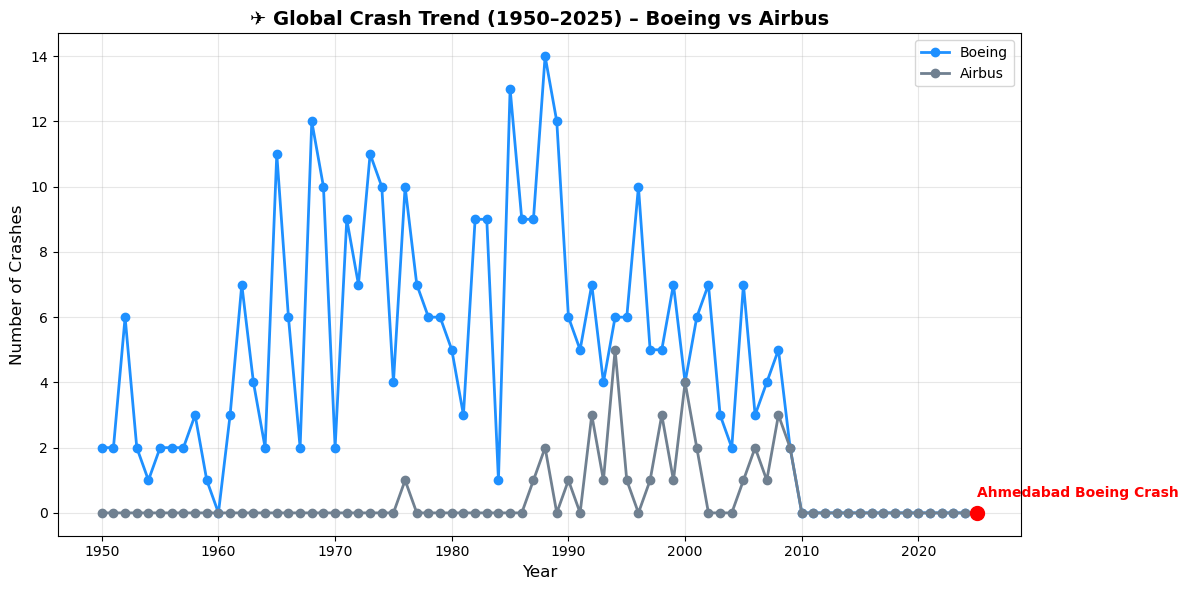

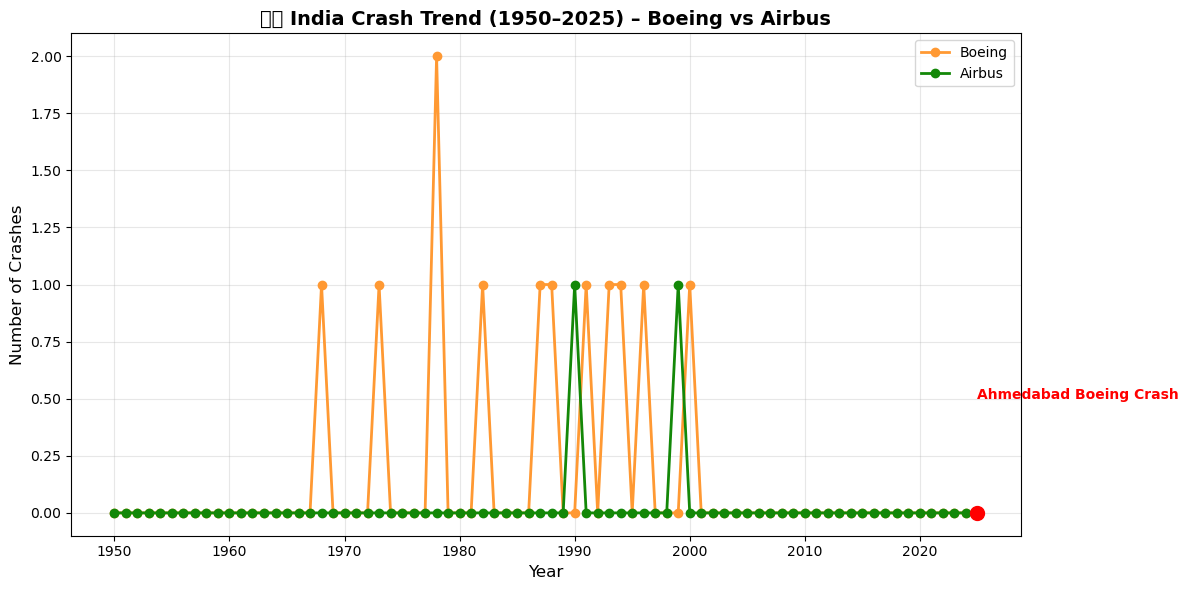

In [11]:
# Year range
years = np.arange(1950, 2026)
manufacturers = ['Boeing', 'Airbus']


# Function to plot trend with highlights

def plot_trend(df_plot, location_name, highlight_crashes=None, colors=None):
    trend = df_plot.groupby(['Year', 'Manufacturer']).size().unstack(fill_value=0)
    trend = trend.reindex(years, fill_value=0)
    for man in manufacturers:
        if man not in trend.columns:
            trend[man] = 0

    plt.figure(figsize=(12,6))
    plt.plot(trend.index, trend['Boeing'], marker='o', label='Boeing', color=colors.get('Boeing', '#1E90FF'), linewidth=2)
    plt.plot(trend.index, trend['Airbus'], marker='o', label='Airbus', color=colors.get('Airbus', '#708090'), linewidth=2)

    # Highlight specific crashes
    if highlight_crashes is not None:
        for crash in highlight_crashes:
            year = crash['Year']
            man = crash['Manufacturer']
            label = crash['Label']
            y_value = trend.loc[year, man]
            plt.scatter(year, y_value, color='red', s=100, zorder=5)
            plt.text(year, y_value + 0.5, label, color='red', fontsize=10, fontweight='bold')

    plt.title(f"{location_name} Crash Trend (1950–2025) – Boeing vs Airbus", fontsize=14, fontweight='bold')
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Crashes", fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Global Trend

highlight_global = [
    {'Year': 2025, 'Manufacturer': 'Boeing', 'Label': 'Ahmedabad Boeing Crash'}
]
colors_global = {'Boeing': '#1E90FF', 'Airbus': '#708090'}
plot_trend(df_filtered, "✈️ Global", highlight_crashes=highlight_global, colors=colors_global)


# India Trend
india_df = df_filtered[df_filtered['Location'].str.contains('India', case=False, na=False)]
highlight_india = [
    {'Year': 2025, 'Manufacturer': 'Boeing', 'Label': 'Ahmedabad Boeing Crash'}
]
colors_india = {'Boeing': '#FF9933', 'Airbus': '#138808'}
plot_trend(india_df, "🇮🇳 India", highlight_crashes=highlight_india, colors=colors_india)

Severity Analysis

In [12]:
# Separate India data
india_df = df_filtered[df_filtered['Location'].str.contains('India', case=False, na=False)]


# Prepare data for plots
fatalities_global = df_filtered.groupby('Manufacturer')['Fatalities'].sum().reset_index()
fatalities_india = india_df.groupby('Manufacturer')['Fatalities'].sum().reset_index()


# Create Subplots (2 rows x 2 columns)
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type':'domain'}, {'type':'domain'}],
           [{'type':'xy'}, {'type':'xy'}]],
    subplot_titles=("Global Fatalities Share", "India Fatalities Share",
                    "Global Fatalities per Crash", "India Fatalities per Crash")
)

#Donut Plots
fig.add_trace(go.Pie(labels=fatalities_global['Manufacturer'],
                     values=fatalities_global['Fatalities'],
                     name="Global", hole=0.4,
                     marker=dict(colors=['#1E90FF','#708090']),
                     hoverinfo='label+percent+value'), row=1, col=1)

fig.add_trace(go.Pie(labels=fatalities_india['Manufacturer'],
                     values=fatalities_india['Fatalities'],
                     name="India", hole=0.4,
                     marker=dict(colors=['#FF9933','#138808']),
                     hoverinfo='label+percent+value'), row=1, col=2)

#Violin Plots
# Global
fig.add_trace(go.Violin(y=df_filtered[df_filtered['Manufacturer']=='Boeing']['Fatalities'],
                        name='Boeing', legendgroup='Boeing',
                        box_visible=True, line_color='#1E90FF'), row=2, col=1)
fig.add_trace(go.Violin(y=df_filtered[df_filtered['Manufacturer']=='Airbus']['Fatalities'],
                        name='Airbus', legendgroup='Airbus',
                        box_visible=True, line_color='#708090'), row=2, col=1)

# India
fig.add_trace(go.Violin(y=india_df[india_df['Manufacturer']=='Boeing']['Fatalities'],
                        name='Boeing', legendgroup='Boeing',
                        box_visible=True, line_color='#FF9933', showlegend=False), row=2, col=2)
fig.add_trace(go.Violin(y=india_df[india_df['Manufacturer']=='Airbus']['Fatalities'],
                        name='Airbus', legendgroup='Airbus',
                        box_visible=True, line_color='#138808', showlegend=False), row=2, col=2)

# Update layout
fig.update_layout(
    height=900, width=1000,
    title_text="Crash Severity Analysis – Boeing vs Airbus (Global & India)",
    showlegend=True,
    template='plotly_white'
)

fig.update_yaxes(type='log', title_text='Fatalities per Crash (Log Scale)', row=2, col=1)
fig.update_yaxes(type='log', title_text='Fatalities per Crash (Log Scale)', row=2, col=2)

fig.show()


Model contribution to fatalities

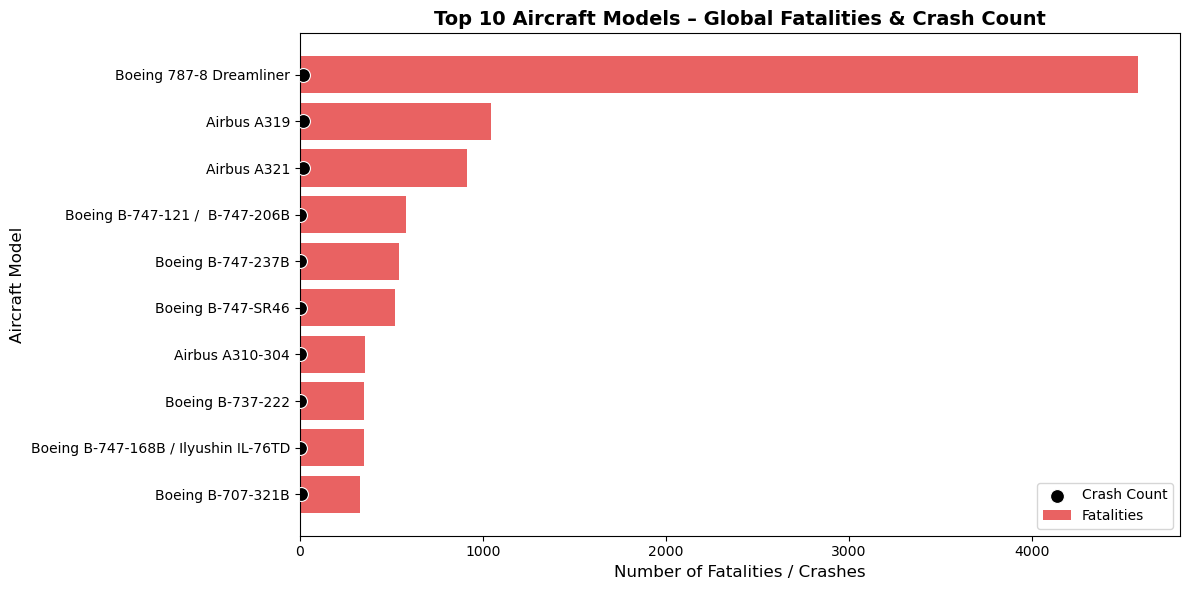

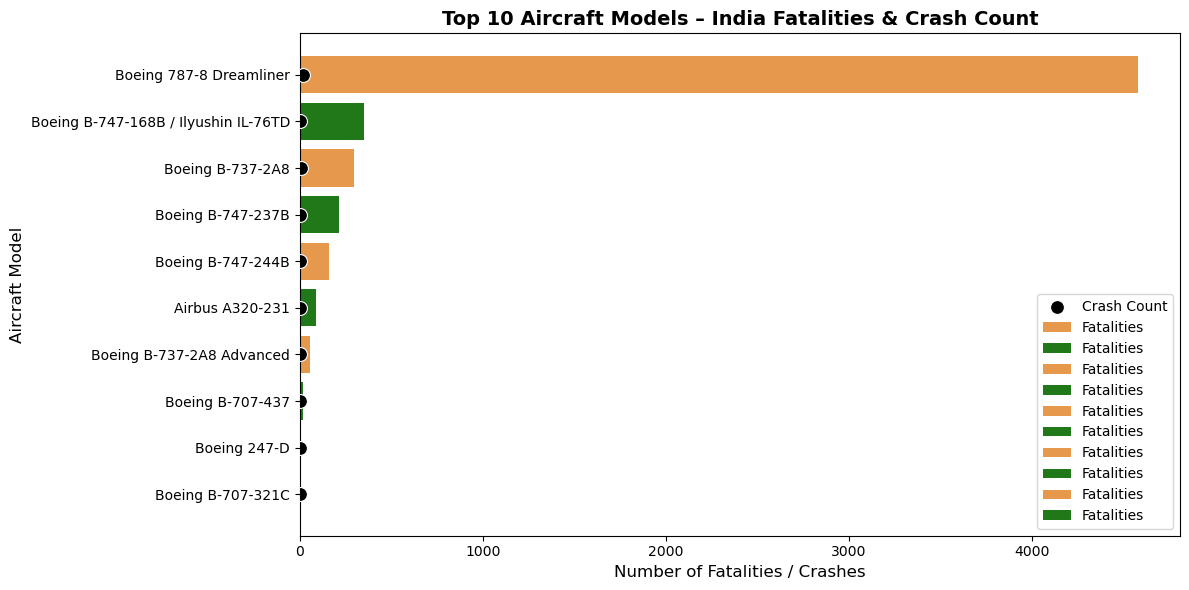

In [13]:
# Extract Manufacturer & Model safely
df_filtered['Manufacturer'] = df_filtered['Type'].str.extract('(Boeing|Airbus)', expand=False)
df_filtered['Model'] = df_filtered['Type'].astype(str) \
                        .str.replace('Boeing|Airbus', '', case=False, regex=True) \
                        .str.strip()


# GLOBAL: Top 10 Models by Fatalities + Crash Counts
global_stats = df_filtered.groupby(['Manufacturer', 'Model']).agg(
    Total_Fatalities=('Fatalities', 'sum'),
    Crash_Count=('Fatalities', 'count')
).reset_index()

top_global = global_stats.sort_values('Total_Fatalities', ascending=False).head(10)
top_global['Label'] = top_global.apply(lambda row: f"{row['Manufacturer']} {row['Model']}", axis=1)

plt.figure(figsize=(12,6))
sns.barplot(x='Total_Fatalities', y='Label', data=top_global, color='#FF4C4C', label='Fatalities')
sns.scatterplot(x='Crash_Count', y='Label', data=top_global, color='black', s=100, label='Crash Count', zorder=10)
plt.xlabel("Number of Fatalities / Crashes", fontsize=12)
plt.ylabel("Aircraft Model", fontsize=12)
plt.title("Top 10 Aircraft Models – Global Fatalities & Crash Count", fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


# INDIA: Top 10 Models by Fatalities + Crash Counts

india_df = df_filtered[df_filtered['Location'].str.contains('India', case=False, na=False)]

india_stats = india_df.groupby(['Manufacturer', 'Model']).agg(
    Total_Fatalities=('Fatalities', 'sum'),
    Crash_Count=('Fatalities', 'count')
).reset_index()

top_india = india_stats.sort_values('Total_Fatalities', ascending=False).head(10)
top_india['Label'] = top_india.apply(lambda row: f"{row['Manufacturer']} {row['Model']}", axis=1)

plt.figure(figsize=(12,6))
sns.barplot(x='Total_Fatalities', y='Label', data=top_india, palette=['#FF9933','#138808'], label='Fatalities')
sns.scatterplot(x='Crash_Count', y='Label', data=top_india, color='black', s=100, label='Crash Count', zorder=10)
plt.xlabel("Number of Fatalities / Crashes", fontsize=12)
plt.ylabel("Aircraft Model", fontsize=12)
plt.title("Top 10 Aircraft Models – India Fatalities & Crash Count", fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

Fleet size and volume(boeing and airbus) fatalities and crashes

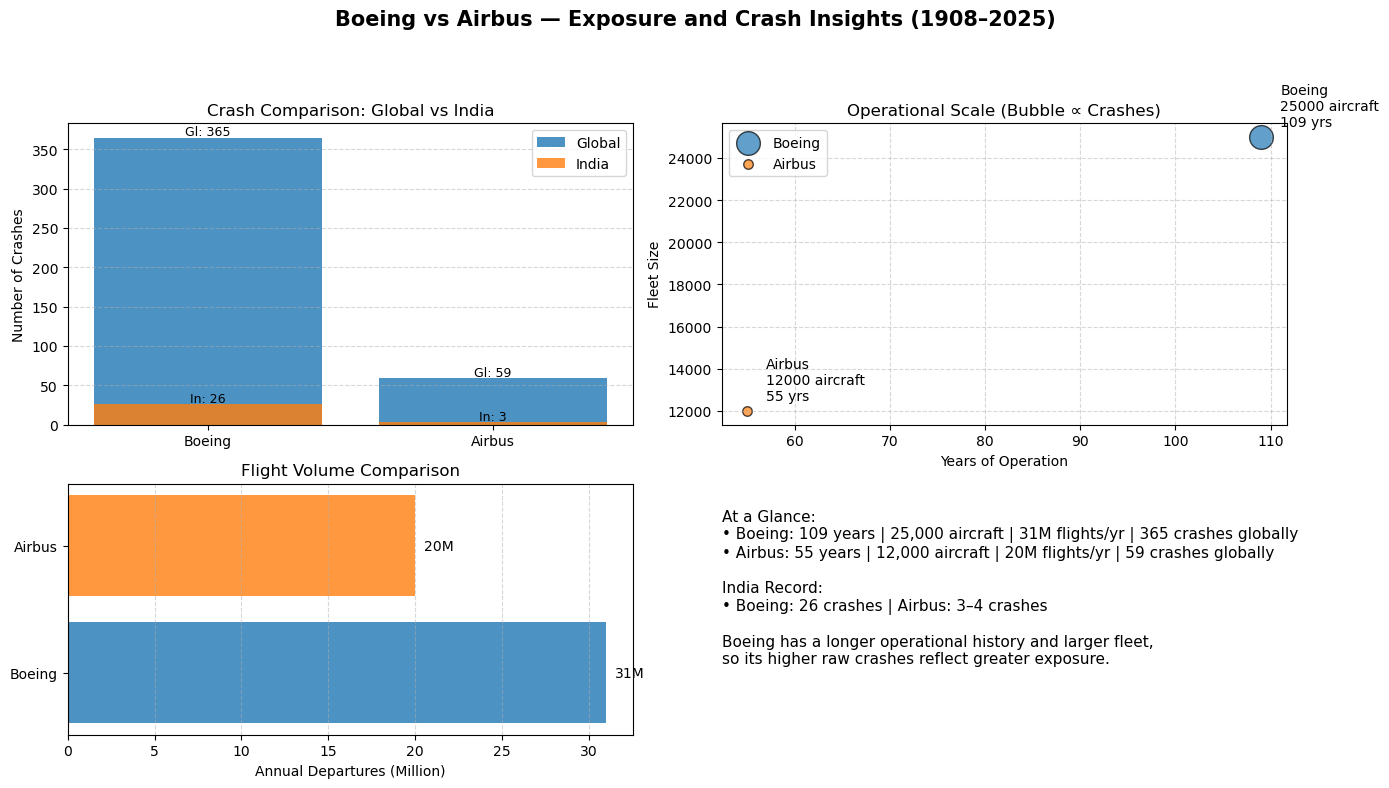

In [14]:

# Step 1: Create dataset
data = {
    'Region': ['Global', 'Global', 'India', 'India'],
    'Manufacturer': ['Boeing', 'Airbus', 'Boeing', 'Airbus'],
    'Crashes': [365, 59, 26, 3],
    'Fleet_Size': [25000, 12000, 25000, 12000],
    'Years_Operation': [109, 55, 109, 55],
    'Departures_Million': [31, 20, 31, 20]
}
df = pd.DataFrame(data)

# Step 2: Define colors
colors = {'Boeing': '#1f77b4', 'Airbus': '#ff7f0e'}

# Step 3: Create layout with GridSpec
plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, height_ratios=[1.2, 1], width_ratios=[1, 1])
plt.suptitle("Boeing vs Airbus — Exposure and Crash Insights (1908–2025)", fontsize=15, fontweight='bold')

# Step 4: Bar chart for Global and India crashes
ax1 = plt.subplot(gs[0, 0])
for region in ['Global', 'India']:
    subset = df[df['Region'] == region]
    ax1.bar(subset['Manufacturer'], subset['Crashes'], label=region, alpha=0.8)
    for i, val in enumerate(subset['Crashes']):
        ax1.text(i, val + 3, f"{region[:2]}: {val}", fontsize=9, ha='center')
ax1.set_title('Crash Comparison: Global vs India')
ax1.set_ylabel('Number of Crashes')
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Step 5: Bubble chart for Fleet vs Years
ax2 = plt.subplot(gs[0, 1])
for manu in ['Boeing', 'Airbus']:
    sub = df[(df['Region'] == 'Global') & (df['Manufacturer'] == manu)]
    ax2.scatter(sub['Years_Operation'], sub['Fleet_Size'], s=sub['Crashes'] * 0.8,
                color=colors[manu], alpha=0.7, edgecolor='black', label=manu)
    ax2.text(sub['Years_Operation'].values[0] + 2, sub['Fleet_Size'].values[0] + 500,
             f"{manu}\n{int(sub['Fleet_Size'])} aircraft\n{int(sub['Years_Operation'])} yrs", fontsize=10)
ax2.set_xlabel('Years of Operation')
ax2.set_ylabel('Fleet Size')
ax2.set_title('Operational Scale (Bubble ∝ Crashes)')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)

# Step 6: Horizontal bar chart for Departures
ax3 = plt.subplot(gs[1, 0])
global_data = df[df['Region'] == 'Global']
ax3.barh(global_data['Manufacturer'], global_data['Departures_Million'],
         color=[colors[m] for m in global_data['Manufacturer']], alpha=0.8)
for i, val in enumerate(global_data['Departures_Million']):
    ax3.text(val + 0.5, i, f"{val}M", va='center', fontsize=10)
ax3.set_xlabel('Annual Departures (Million)')
ax3.set_title('Flight Volume Comparison')
ax3.grid(axis='x', linestyle='--', alpha=0.5)

# Step 7: Summary text block
ax4 = plt.subplot(gs[1, 1])
ax4.axis('off')
text = (
    "At a Glance:\n"
    "• Boeing: 109 years | 25,000 aircraft | 31M flights/yr | 365 crashes globally\n"
    "• Airbus: 55 years | 12,000 aircraft | 20M flights/yr | 59 crashes globally\n\n"
    "India Record:\n"
    "• Boeing: 26 crashes | Airbus: 3–4 crashes\n\n"
    "Boeing has a longer operational history and larger fleet,\n"
    "so its higher raw crashes reflect greater exposure."
)
ax4.text(0, 0.9, text, fontsize=11, va='top')

# Step 8: Display final plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Normalizing safty over fleet size volume years of operation



=== Step-by-Step Crash Rate Normalization ===

Global - Boeing
  Raw Rate: (365 / (25000 × 31)) × 10^6 = 470.967742
  Adjusted Crashes: 365 × (55/109) = 184.17
  Adjusted Rate: (184.17 / (25000 × 31)) × 10^6 = 237.644273
  Normalized (Modern) Rate: 237.644273 / 6 = 39.607379

Global - Airbus
  Raw Rate: (59 / (12000 × 20)) × 10^6 = 245.833333
  Adjusted Crashes: 59
  Adjusted Rate: (59.00 / (12000 × 20)) × 10^6 = 245.833333
  Normalized (Modern) Rate: 245.833333 / 6 = 40.972222

India - Boeing
  Raw Rate: (26 / (25000 × 31)) × 10^6 = 33.548387
  Adjusted Crashes: 26 × (55/109) = 13.12
  Adjusted Rate: (13.12 / (25000 × 31)) × 10^6 = 16.928085
  Normalized (Modern) Rate: 16.928085 / 6 = 2.821348

India - Airbus
  Raw Rate: (3 / (12000 × 20)) × 10^6 = 12.500000
  Adjusted Crashes: 3
  Adjusted Rate: (3.00 / (12000 × 20)) × 10^6 = 12.500000
  Normalized (Modern) Rate: 12.500000 / 6 = 2.083333



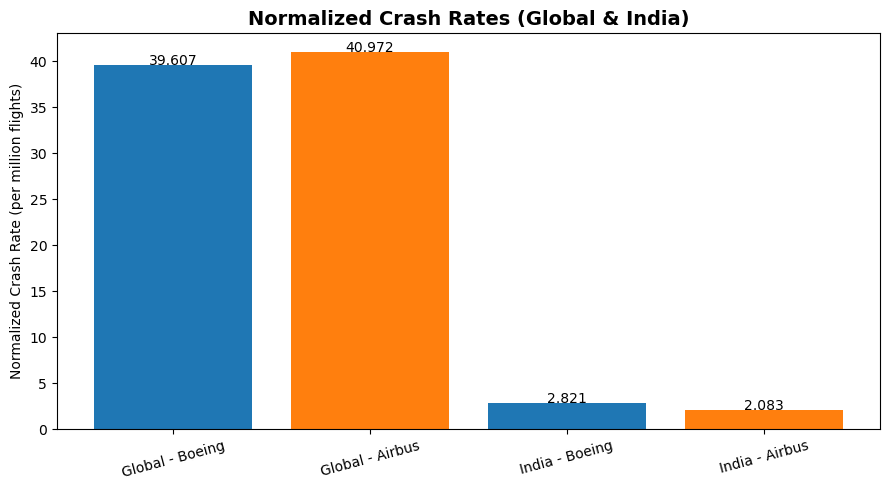

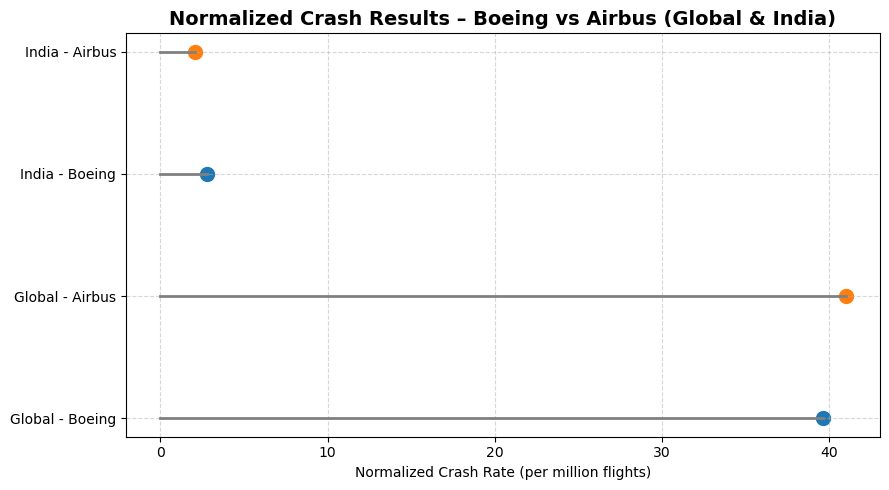

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define Raw Crash Data
data = {
    'Region': ['Global', 'Global', 'India', 'India'],
    'Manufacturer': ['Boeing', 'Airbus', 'Boeing', 'Airbus'],
    'Crashes': [365, 59, 26, 3],
    'Fleet_Size': [25000, 12000, 25000, 12000],
    'Departures_Million': [31, 20, 31, 20],
    'Years_Operation': [109, 55, 109, 55]
}

df = pd.DataFrame(data)

# Step 2: Normalization Calculation
# Step 2.1: Raw crash rate per million flights
df['Raw_Rate'] = (df['Crashes'] / (df['Fleet_Size'] * df['Departures_Million'])) * 1e6

# Step 2.2: Adjust Boeing for longer operation period (scale to Airbus's 55 years)
df['Adjusted_Crashes'] = df.apply(
    lambda row: row['Crashes'] * (55 / 109) if row['Manufacturer'] == 'Boeing' else row['Crashes'], axis=1
)

# Step 2.3: Adjusted crash rate
df['Adjusted_Rate'] = (df['Adjusted_Crashes'] / (df['Fleet_Size'] * df['Departures_Million'])) * 1e6

# Step 2.4: Normalize further to reflect modern safety improvement (divide by 6)
df['Normalized_Rate'] = df['Adjusted_Rate'] / 6

# Step 3: Print Step-by-Step Calculation
print("\n=== Step-by-Step Crash Rate Normalization ===\n")
for i, row in df.iterrows():
    print(f"{row['Region']} - {row['Manufacturer']}")
    print(f"  Raw Rate: ({row['Crashes']} / ({row['Fleet_Size']} × {row['Departures_Million']})) × 10^6 = {row['Raw_Rate']:.6f}")
    if row['Manufacturer'] == 'Boeing':
        print(f"  Adjusted Crashes: {row['Crashes']} × (55/109) = {row['Adjusted_Crashes']:.2f}")
    else:
        print(f"  Adjusted Crashes: {row['Crashes']}")
    print(f"  Adjusted Rate: ({row['Adjusted_Crashes']:.2f} / ({row['Fleet_Size']} × {row['Departures_Million']})) × 10^6 = {row['Adjusted_Rate']:.6f}")
    print(f"  Normalized (Modern) Rate: {row['Adjusted_Rate']:.6f} / 6 = {row['Normalized_Rate']:.6f}\n")

# Step 4: Visualization - Bar Plot
plt.figure(figsize=(9,5))
colors = ['#1f77b4' if x == 'Boeing' else '#ff7f0e' for x in df['Manufacturer']]

plt.bar(df['Region'] + " - " + df['Manufacturer'], df['Normalized_Rate'], color=colors)
for i, val in enumerate(df['Normalized_Rate']):
    plt.text(i, val + 0.001, f"{val:.3f}", ha='center', fontsize=10)

plt.title('Normalized Crash Rates (Global & India)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Crash Rate (per million flights)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Step 5: Visualization - Lollipop Plot
plt.figure(figsize=(9,5))
for i, row in df.iterrows():
    plt.plot([0, row['Normalized_Rate']], [i, i], color='gray', linewidth=2)
    plt.scatter(row['Normalized_Rate'], i,
                color='#1f77b4' if row['Manufacturer'] == 'Boeing' else '#ff7f0e', s=100)

plt.yticks(range(len(df)), df['Region'] + " - " + df['Manufacturer'])
plt.xlabel('Normalized Crash Rate (per million flights)')
plt.title('Normalized Crash Results – Boeing vs Airbus (Global & India)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


CHI-SQUARE TEST

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

# ----------------------------------------------------------
# 1. LOAD THE ORIGINAL CRASH DATASET
# ----------------------------------------------------------
df_raw = pd.read_csv("Airplane_Crashes_Fatalities_Data_from_1908_to_2025.csv")

# ----------------------------------------------------------
# 2. CREATE A FATAL FLAG (1 = fatal crash, 0 = non-fatal)
# ----------------------------------------------------------
df_raw['fatal_flag'] = df_raw['Fatalities'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

# ----------------------------------------------------------
# 3. FILTER ONLY BOEING AND AIRBUS
# ----------------------------------------------------------
df_manu = df_raw[df_raw['Manufacturer'].isin(["Boeing", "Airbus"])]

# ----------------------------------------------------------
# 4. BUILD THE CONTINGENCY TABLE
# ----------------------------------------------------------
severity_table = pd.crosstab(df_manu['Manufacturer'], df_manu['fatal_flag'])
severity_table.columns = ["NonFatal", "Fatal"]

print("Contingency Table:")
print(severity_table)

# ----------------------------------------------------------
# 5. RUN THE CHI-SQUARE TEST
# ----------------------------------------------------------
chi2, p, dof, expected = chi2_contingency(severity_table)

print("\nChi-Square Test Results")
print("-----------------------")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("\nExpected frequencies:")
print(expected)


Contingency Table:
              NonFatal  Fatal
Manufacturer                 
Airbus               5     30
Boeing              16    362

Chi-Square Test Results
-----------------------
Chi-square statistic: 4.786642573696146
p-value: 0.02868128058312997
Degrees of freedom: 1

Expected frequencies:
[[  1.77966102  33.22033898]
 [ 19.22033898 358.77966102]]


Normalize chi square

In [29]:
import numpy as np
from scipy.stats import chi2

# Exposure factors
years_boeing = 109
years_airbus = 55

fleet_boeing = 25000
fleet_airbus = 12000

flights_boeing = 31_000_000   # 31 million
flights_airbus = 20_000_000   # 20 million

# Composite exposure index
expo_boeing = years_boeing * fleet_boeing * flights_boeing
expo_airbus = years_airbus * fleet_airbus * flights_airbus

# Exposure weights
w_boeing = expo_boeing / (expo_boeing + expo_airbus)
w_airbus = expo_airbus / (expo_boeing + expo_airbus)

# Observed crashes
obs_boeing = 365
obs_airbus = 59
total_crashes = obs_boeing + obs_airbus

# Expected crashes after normalization
exp_boeing = total_crashes * w_boeing
exp_airbus = total_crashes * w_airbus

# Chi-square manually (goodness-of-fit)
chi2_norm = ((obs_boeing - exp_boeing)**2 / exp_boeing) + \
            ((obs_airbus - exp_airbus)**2 / exp_airbus)

p_norm = 1 - chi2.cdf(chi2_norm, df=1)

print("=== NORMALIZED CHI-SQUARE TEST ===")
print("Exposure weights -> Boeing:", w_boeing, "| Airbus:", w_airbus)
print("Expected crashes -> Boeing:", exp_boeing, "| Airbus:", exp_airbus)
print("Chi-square:", chi2_norm)
print("p-value:", p_norm)
print("Degrees of freedom: 1")


=== NORMALIZED CHI-SQUARE TEST ===
Exposure weights -> Boeing: 0.8648579472741234 | Airbus: 0.13514205272587662
Expected crashes -> Boeing: 366.6997696442283 | Airbus: 57.30023035577169
Chi-square: 0.05830140079411218
p-value: 0.8092010713273163
Degrees of freedom: 1


RAW Mann–Whitney Test — BEFORE NORMALIZATION

In [30]:
from scipy.stats import mannwhitneyu

# Extract severity lists
boeing_sev = df_raw[df_raw['Manufacturer'] == 'Boeing']['Fatalities'].fillna(0)
airbus_sev = df_raw[df_raw['Manufacturer'] == 'Airbus']['Fatalities'].fillna(0)

# Run Mann–Whitney U Test
u_stat, p_value = mannwhitneyu(boeing_sev, airbus_sev, alternative='two-sided')

print("=== RAW MANN–WHITNEY TEST ===")
print("U-statistic:", u_stat)
print("p-value:", p_value)


=== RAW MANN–WHITNEY TEST ===
U-statistic: 6002.5
p-value: 0.3647053866811776


NORMALIZED Mann–Whitney Test — AFTER NORMALIZATION

Independent t-test (RAW)

In [32]:
from scipy.stats import ttest_ind

# Extract severity values from df_raw
boeing_sev = df_raw[df_raw['Manufacturer'].str.contains("Boeing", case=False, na=False)]['Fatalities'].fillna(0)
airbus_sev = df_raw[df_raw['Manufacturer'].str.contains("Airbus", case=False, na=False)]['Fatalities'].fillna(0)

# Welch's t-test (does not assume equal variance)
t_stat, p_val = ttest_ind(boeing_sev, airbus_sev, equal_var=False)

print("=== RAW T-TEST ===")
print("t-statistic:", t_stat)
print("p-value:", p_val)


=== RAW T-TEST ===
t-statistic: -2.1755725792744265
p-value: 0.03596274784440598


Spearman Correlation (using df_raw)

In [36]:
from scipy.stats import spearmanr

# Convert date to year
df_raw['Year'] = pd.to_datetime(df_raw['Date'], errors='coerce').dt.year

# Remove rows where 'Year' is missing
df_corr = df_raw.dropna(subset=['Year'])

# Extract aligned values
years = df_corr['Year']
fatalities = df_corr['Fatalities'].fillna(0)

# Spearman correlation
rho, p_val = spearmanr(years, fatalities)

print("=== SPEARMAN CORRELATION: YEAR vs FATALITIES ===")
print("Spearman rho:", rho)
print("p-value:", p_val)


=== SPEARMAN CORRELATION: YEAR vs FATALITIES ===
Spearman rho: 0.023676991786828163
p-value: 0.0857359771759795


Poisson regression:

In [37]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Manufacturer crash counts
crash_counts = df_raw['Manufacturer'].str.contains("Boeing", case=False, na=False).value_counts()

boeing_count = df_raw['Manufacturer'].str.contains("Boeing", case=False, na=False).sum()
airbus_count = df_raw['Manufacturer'].str.contains("Airbus", case=False, na=False).sum()

# Create dataframe for regression
data = pd.DataFrame({
    'Manufacturer': ['Boeing', 'Airbus'],
    'Crashes': [boeing_count, airbus_count],
    'Exposure': [84475000000000, 13200000000000]  # from earlier composite exposure
})

# Convert Manufacturer to binary variable
data['MFG'] = data['Manufacturer'].map({'Boeing':1, 'Airbus':0})

# Poisson regression with exposure offset
model = sm.GLM(
    data['Crashes'],
    sm.add_constant(data['MFG']),
    family=sm.families.Poisson(),
    offset=np.log(data['Exposure'])
)

result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                Crashes   No. Observations:                    2
Model:                            GLM   Df Residuals:                        0
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.5856
Date:                Sat, 06 Dec 2025   Deviance:                  -9.7700e-15
Time:                        23:19:07   Pearson chi2:                 4.63e-26
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9937
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.6559      0.169   -157.698      0.0

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

